In [2]:
# 데이터 구성 패키지
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib as mpl

import matplotlib.pyplot as plt

# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

In [3]:
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = mpl.font_manager.FontProperties(fname = font_location).get_name()
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font',family= font_name)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
df_2 = pd.read_pickle('/home/pirl/Downloads/df_copy_June.pkl')
df_2.shape

In [4]:
df_1 = pd.read_excel("/home/pirl/Downloads/인구수_피봇.xlsx")
df_1.head(3)

,지역,구군,시점,인구
0,서울특별시,소계,2016. 12,9930616
1,서울특별시,소계,2017. 01,9930478
2,서울특별시,소계,2017. 02,9931412


In [5]:
df_eco = pd.read_excel("/home/pirl/Downloads/킹기지수.xlsx")
df_eco.head(3)

,시점,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100)
0,2016. 12,106.4,105.1,104.7
1,2017. 01,106.8,105.7,105.1
2,2017. 02,107.3,105.9,105.4


In [6]:
df_gdp = pd.read_excel("/home/pirl/Downloads/gdp.xlsx")
df_gdp.head(3)

,분기,gdp
0,2017Q1,384682.7
1,2017Q2,387115.3
2,2017Q3,392515.9


In [7]:
df_1 = pd.merge(df_1,df_eco, on='시점',how = 'left')

In [8]:
df_1["시점"] = pd.to_datetime(df_1['시점'])

In [9]:
df_1['분기'] = pd.PeriodIndex(df_1['시점'], freq='Q')

In [10]:
df_1['분기'] = df_1['분기'].astype('str')

In [11]:
df_1 = pd.merge(df_1,df_gdp, on='분기',how = 'left')

In [12]:
df_1.head()

,지역,구군,시점,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),분기,gdp
0,서울특별시,소계,2016-12-01,9930616,106.4,105.1,104.7,2016Q4,NaN
1,서울특별시,소계,2017-01-01,9930478,106.8,105.7,105.1,2017Q1,384682.7
2,서울특별시,소계,2017-02-01,9931412,107.3,105.9,105.4,2017Q1,384682.7
3,서울특별시,소계,2017-03-01,9926968,107.6,106.4,105.7,2017Q1,384682.7
4,서울특별시,소계,2017-04-01,9922745,108.1,106.7,106.0,2017Q2,387115.3


In [13]:
df_1.구군 = df_1.구군.str.strip() 
df_2.구군 = df_2.구군.str.strip() 

In [14]:
df_1.시점 = df_1.시점.astype("str")
df_2["시점"] = df_2["Calendar Day일 2"].astype("str")

In [15]:
df_2["시점"] = df_2["시점"].str[:7]

In [16]:
df_1["시점"] = df_1["시점"].str[:7]

In [17]:
df_raw = pd.merge(df_2,df_1, on=['지역','구군','시점'],how = 'left')

In [18]:
df_raw.head()

,CUSTOMER NAME,Calendar Day일 2,POS Category Code,품목명,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,수량(CS),...,구군,공법,KF규격,시점,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),분기,gdp
0,(주)지에스리테일 본부,2017-01-01,MP,CNX 황사마스크 대형1P,49000.0,27,27.0,1815.0,50,0.5,...,평택시,CNX,0,2017-01,472141.0,106.8,105.7,105.1,2017Q1,384682.7
1,(주)지에스리테일 본부,2017-01-01,MG,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,84000.0,28,0.0,3000.0,50,0.6,...,평택시,UKM,0,2017-01,472141.0,106.8,105.7,105.1,2017Q1,384682.7
2,(주)지에스리테일 본부,2017-01-01,MG,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,57000.0,20,0.0,2850.0,50,0.4,...,평택시,UKM,0,2017-01,472141.0,106.8,105.7,105.1,2017Q1,384682.7
3,(주)지에스리테일 본부,2017-01-01,MG,CNX 황사마스크 성인용3P,2600.0,1,1.0,2600.0,50,0.0,...,포천시,CNX,0,2017-01,154381.0,106.8,105.7,105.1,2017Q1,384682.7
4,(주)지에스리테일 본부,2017-01-01,MP,CNX KF94 방역용 마스크 1입,5000.0,2,2.0,2500.0,50,0.0,...,포천시,CNX,KF94,2017-01,154381.0,106.8,105.7,105.1,2017Q1,384682.7


In [19]:
df_raw.to_pickle("/home/pirl/Downloads/newmerge.pkl") 

In [20]:
df_raw[df_raw['인구'].isnull()]['구군'].value_counts()

성남시 분당구     1198
고양시 덕양구     1042
부천시 원미구      967
수원시 권선구      958
용인시 기흥구      931
안산시 상록구      888
고양시 일산서구     826
안산시 단원구      770
안양시 동안구      751
용인시 수지구      750
고양시 일산동구     743
성남시 중원구      724
수원시 장안구      690
수원시 영통구      666
성남시 수정구      552
안양시 만안구      547
수원시 팔달구      526
부천시 오정구      490
용인시 처인구      419
부천시 소사구      356
남구           317
여주군           58
Name: 구군, dtype: int64

In [33]:
df_air = pd.read_pickle("/home/pirl/Downloads/pickled_dust(1).pkl") 

In [34]:
df_air.head(4)

,date,지역,SO2,CO,O3,NO2,PM10,PM25
0,2017-01-01,경기 가평군,0.003913,0.791304,0.005217,0.021652,96.913043,66.130435
1,2017-01-01,경기 고양시,0.008467,0.966304,0.005011,0.048478,80.685714,NaN
2,2017-01-01,경기 과천시,0.004978,1.200000,0.006413,0.040543,70.021739,36.608696
3,2017-01-01,경기 광명시,0.005696,0.945652,0.008587,0.041283,68.717391,38.913043


In [66]:
df_1.구군.value_counts()

중구         156
동구         156
남구         148
북구         130
서구         130
세종특별자치시     52
고성군         52
강서구         52
만안구         26
동해시         26
영동군         26
가평군         26
파주시         26
연천군         26
당진시         26
익산시         26
은평구         26
화천군         26
영등포구        26
춘천시         26
창원시         26
경기도         26
영덕군         26
영통구         26
함양군         26
과천시         26
제주특별자치도     26
제천시         26
부산광역시       26
동래구         26
          ... 
수원시         26
진천군         26
단양군         26
남동구         26
청원구         26
금천구         26
분당구         26
이천시         26
청도군         26
전주시         26
동두천시        26
통영시         26
부안군         26
중랑구         26
철원군         26
달서구         26
장흥군         26
부평구         26
군위군         26
의성군         26
용인시         26
서원구         26
군산시         26
진주시         26
서초구         26
보성군         26
순창군         26
안동시         26
의창구         26
미추홀구         8
Name: 구군, Length: 252, dtype: int64

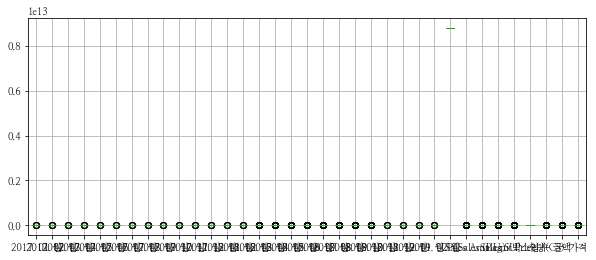

In [11]:
df_raw.boxplot(figsize=(10,4))

In [17]:
df_raw_obj = df_raw.select_dtypes(exclude="object")
df_raw_obj.head()

,Unnamed: 0,인구,UPC,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,수량(CS),금액,가격
0,0,152405.0,8801166000000,37800.0,14,14.0,2700.0,50,0.3,37800,2700
1,1,152398.0,8801166000000,37800.0,14,14.0,2700.0,50,0.3,37800,2700
2,2,153589.0,8801166000000,37800.0,14,14.0,2700.0,50,0.3,37800,2700
3,3,153937.0,8801166000000,37800.0,14,14.0,2700.0,50,0.3,37800,2700
4,4,154293.0,8801166000000,37800.0,14,14.0,2700.0,50,0.3,37800,2700


In [18]:
df_raw_inf = df_raw.select_dtypes(include="object")
df_raw_inf.head()

,지역,구군,시점,CUSTOMER NAME,Calendar Day일 2,POS Category Code,품목명,Manufacturer,구분,유통사,SUB-CTG
0,서울특별시,종로구,2017. 01,롯데쇼핑㈜롯데슈퍼사업부,2017-01-07,MG,UKM 크리넥스 건강마스크 여성용3입,UKM Company,POS,롯데쇼핑㈜롯데슈퍼사업부,MG
1,서울특별시,종로구,2017. 02,롯데쇼핑㈜롯데슈퍼사업부,2017-01-07,MG,UKM 크리넥스 건강마스크 여성용3입,UKM Company,POS,롯데쇼핑㈜롯데슈퍼사업부,MG
2,서울특별시,종로구,2017. 03,롯데쇼핑㈜롯데슈퍼사업부,2017-01-07,MG,UKM 크리넥스 건강마스크 여성용3입,UKM Company,POS,롯데쇼핑㈜롯데슈퍼사업부,MG
3,서울특별시,종로구,2017. 04,롯데쇼핑㈜롯데슈퍼사업부,2017-01-07,MG,UKM 크리넥스 건강마스크 여성용3입,UKM Company,POS,롯데쇼핑㈜롯데슈퍼사업부,MG
4,서울특별시,종로구,2017. 05,롯데쇼핑㈜롯데슈퍼사업부,2017-01-07,MG,UKM 크리넥스 건강마스크 여성용3입,UKM Company,POS,롯데쇼핑㈜롯데슈퍼사업부,MG


In [22]:
# scale 변환 : 평균, 표준편차 기준 -> 평균=0, 표준편차=1인 데이터로 변환
df_scale_std = scale(df_raw_obj)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_raw_obj.columns)
df_scale_std.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,Unnamed: 0,인구,UPC,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,수량(CS),금액,가격
0,-1.732049,-1.847673,0.0,-0.203848,-0.184036,0.189185,-0.304246,0.706469,-0.155236,-0.201818,-0.227938
1,-1.732046,-1.847719,0.0,-0.203848,-0.184036,0.189185,-0.304246,0.706469,-0.155236,-0.201818,-0.227938
2,-1.732043,-1.839768,0.0,-0.203848,-0.184036,0.189185,-0.304246,0.706469,-0.155236,-0.201818,-0.227938
3,-1.732039,-1.837445,0.0,-0.203848,-0.184036,0.189185,-0.304246,0.706469,-0.155236,-0.201818,-0.227938
4,-1.732036,-1.835068,0.0,-0.203848,-0.184036,0.189185,-0.304246,0.706469,-0.155236,-0.201818,-0.227938


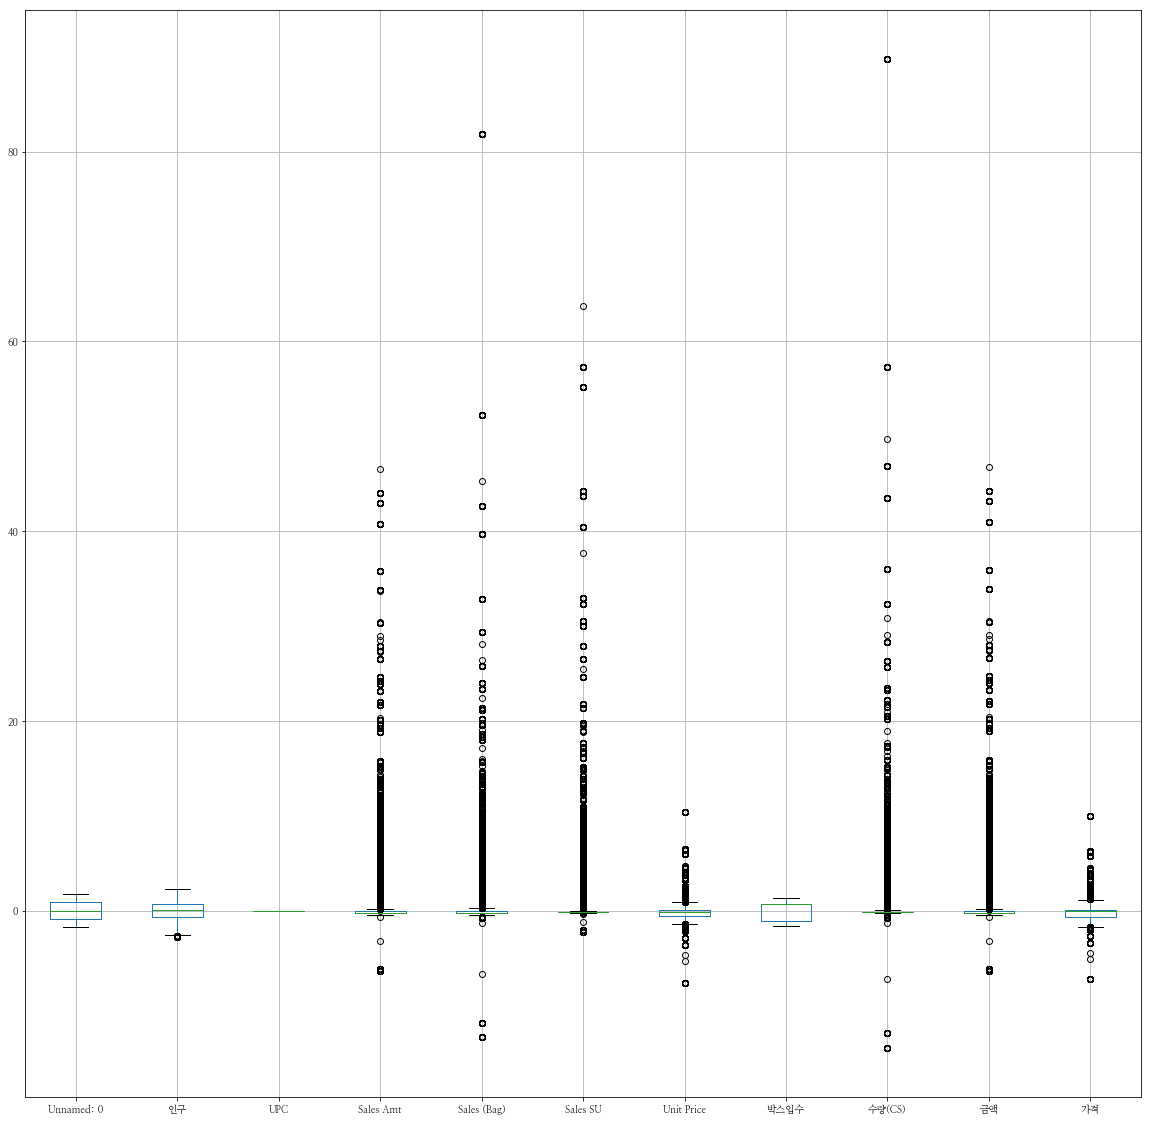

In [68]:
df_scale_std.boxplot(figsize=(20,20))

In [23]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,Unnamed: 0,인구,UPC,Sales Amt,Sales (Bag),Sales SU,Unit Price,박스입수,수량(CS),금액,가격
count,1057738.000,1042886.000,1057738.0,1046465.000,1057738.000,1049986.000,1021962.000,1057738.000,1057738.000,1057738.000,1057738.000
mean,-0.000,-0.000,0.0,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.732,-2.726,0.0,-6.321,-13.312,-2.254,-7.612,-1.578,-14.458,-6.349,-7.224
25%,-0.866,-0.636,0.0,-0.265,-0.255,-0.171,-0.537,-1.040,-0.178,-0.263,-0.638
50%,0.000,0.036,0.0,-0.220,-0.203,-0.171,-0.121,0.706,-0.155,-0.218,-0.052
75%,0.866,0.717,0.0,-0.075,-0.055,-0.119,0.063,0.706,-0.087,-0.075,0.088
max,1.732,2.283,0.0,46.569,81.899,63.700,10.399,1.378,89.719,46.803,10.019


In [26]:
# scale 변환 : MinMax 변환(최소, 최대값 기준)
df_scale_minmax = minmax_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns=df_fitness_num.columns)
df_scale_minmax.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [27]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [28]:
# scale 변환 : 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [29]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [36]:
df_rstpulse = pd.DataFrame()
df_rstpulse["날것"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,날것,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [37]:
df_rstpulse.describe().round(3)

,날것,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff86a96aa90>,
      dtype=object)

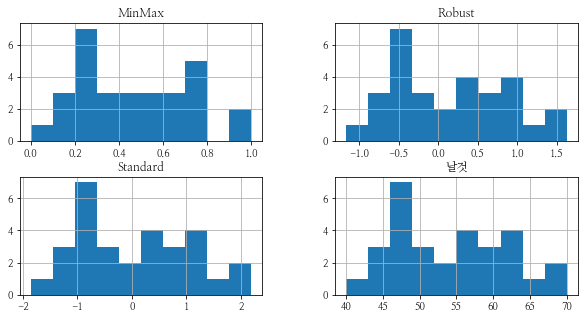

In [42]:
df_rstpulse[["날것", "Standard", "MinMax", "Robust"]].hist(figsize=(10, 5))